## Map Search

把字符串存成常量可以避免一些debug的麻烦。

In [1]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [59]:
import networkx as nx
%matplotlib inline

In [51]:
# help(nx.draw)

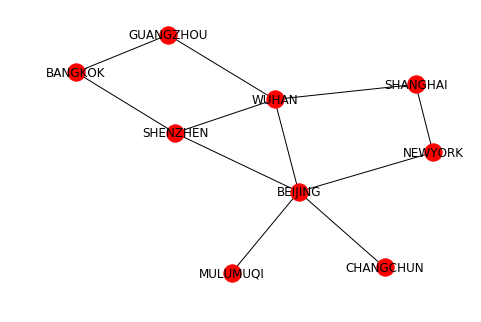

In [86]:
graph = connection
g = nx.Graph(graph)
nx.draw(g, with_labels=True)

In [62]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
        # print(pathes)
        pathes = sorted(pathes, key=len) # 最小换乘
                
        seen.add(froniter)

In [63]:
nagivator(CHANGCHUN, BANGKOK, connection)

['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [64]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
                
        seen.add(froniter)

In [65]:
nagivator_bfs(CHANGCHUN, BANGKOK, connection)

standing on CHANGCHUN Looking forward ['BEIJING']
standing on BEIJING Looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQI Looking forward ['BEIJING']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']


In [66]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

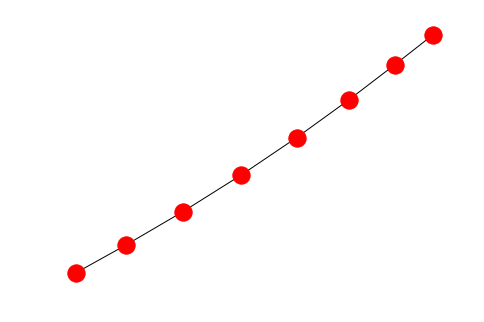

In [67]:
nx.draw(nx.Graph(connection_2))

In [68]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [69]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
                
        seen.add(froniter)

In [70]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [71]:
def draw_route(routes):
    print('🛫->'.join(routes))

In [72]:
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN🛫->BEIJING🛫->SHENZHEN🛫->BANGKOK


## Sentence Generation

In [73]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [74]:
grammar = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

In [75]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [76]:
import random

### don't run this cell
generate("verb_phrase") = generate("verb") + generate("noun_phrase")  
generate('noun') = random.choice("女人 |  篮球 | 桌子 | 小猫")

In [77]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [78]:
g = parse_grammar(grammar)

In [79]:
g

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [80]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [81]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [82]:
gene(g)

'一个女人看着一个桌子'

In [83]:
gene(g, target='Adj*')

''

In [84]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

7/4-5-2
5*2/3+2
4*46*5*5
0-8-3*11
3+2*0+0
7/4+5-9
58+8/1-1
6*89/3+1
2*5-8*0
1*3-6*173
0/5-1/8
2/7+1/1
9+5/9-5
34-7*3-2
4*8+5-1
4/8*430/81
8*04+4*6
8/2-9*9
3+8+0+8
6*14/1-0
